In [0]:
from sklearn.linear_model import LinearRegression, Lasso
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/covid19-analysis/covid19_final_cleaned.csv')

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [33]:
df_dummy = pd.get_dummies(df)
df_dummy

,total-cases,cases,discharged,death,icu,pui,close-contact,tabligh,surveillance,hadr,import,perlis,kedah,pulau-pinang,perak,selangor,negeri-sembilan,melaka,johor,pahang,terengganu,kelantan,sabah,sarawak,wp-kuala-lumpur,wp-putrajaya,wp-labuan,date_1/2/2020,date_1/3/2020,date_1/4/2020,date_1/5/2020,date_1/6/2020,date_10/2/2020,date_10/3/2020,date_10/4/2020,date_10/5/2020,date_11/2/2020,date_11/3/2020,date_11/4/2020,date_11/5/2020,date_12/2/2020,date_12/3/2020,date_12/4/2020,date_12/5/2020,date_13/2/2020,date_13/3/2020,date_13/4/2020,date_13/5/2020,date_14/2/2020,date_14/3/2020,date_14/4/2020,date_14/5/2020,date_15/2/2020,date_15/3/2020,date_15/4/2020,date_15/5/2020,date_16/2/2020,date_16/3/2020,date_16/4/2020,date_16/5/2020,date_17/2/2020,date_17/3/2020,date_17/4/2020,date_17/5/2020,date_18/2/2020,date_18/3/2020,date_18/4/2020,date_18/5/2020,date_19/2/2020,date_19/3/2020,date_19/4/2020,date_19/5/2020,date_2/2/2020,date_2/3/2020,date_2/4/2020,date_2/5/2020,date_2/6/2020,date_20/2/2020,date_20/3/2020,date_20/4/2020,date_20/5/2020,date_21/2/2020,date_21/3/2020,date_21/4/2020,date_21/5/2020,date_22/2/2020,date_22/3/2020,date_22/4/2020,date_22/5/2020,date_23/2/2020,date_23/3/2020,date_23/4/2020,date_23/5/2020,date_24/1/2020,date_24/2/2020,date_24/3/2020,date_24/4/2020,date_24/5/2020,date_25/1/2020,date_25/2/2020,date_25/3/2020,date_25/4/2020,date_25/5/2020,date_26/1/2020,date_26/2/2020,date_26/3/2020,date_26/4/2020,date_26/5/2020,date_27/1/2020,date_27/2/2020,date_27/3/2020,date_27/4/2020,date_27/5/2020,date_28/1/2020,date_28/2/2020,date_28/3/2020,date_28/4/2020,date_28/5/2020,date_29/1/2020,date_29/2/2020,date_29/3/2020,date_29/4/2020,date_29/5/2020,date_3/2/2020,date_3/3/2020,date_3/4/2020,date_3/5/2020,date_30/1/2020,date_30/3/2020,date_30/4/2020,date_30/5/2020,date_31/1/2020,date_31/3/2020,date_31/5/2020,date_4/2/2020,date_4/3/2020,date_4/4/2020,date_4/5/2020,date_5/2/2020,date_5/3/2020,date_5/4/2020,date_5/5/2020,date_6/2/2020,date_6/3/2020,date_6/4/2020,date_6/5/2020,date_7/2/2020,date_7/3/2020,date_7/4/2020,date_7/5/2020,date_8/2/2020,date_8/3/2020,date_8/4/2020,date_8/5/2020,date_9/2/2020,date_9/3/2020,date_9/4/2020,date_9/5/2020
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [0]:
df_dummy.to_csv('/content/drive/My Drive/Colab Notebooks/Data-science/eda_data_dummy.csv')

In [35]:
df.columns

Index(['date', 'total-cases', 'cases', 'discharged', 'death', 'icu', 'pui',
       'close-contact', 'tabligh', 'surveillance', 'hadr', 'import', 'perlis',
       'kedah', 'pulau-pinang', 'perak', 'selangor', 'negeri-sembilan',
       'melaka', 'johor', 'pahang', 'terengganu', 'kelantan', 'sabah',
       'sarawak', 'wp-kuala-lumpur', 'wp-putrajaya', 'wp-labuan'],
      dtype='object')

In [0]:
df['date'] = pd.to_datetime(df['date'])
df['YearMonth'] = df['date'].map(lambda x: 100*x.year + x.month)
df['Year'] = df['date'].map(lambda x: x.year)
df['Month'] = df['date'].map(lambda x: x.month)

In [37]:
max_cardinality = 100
high_cardinality = [col for col in df.select_dtypes(exclude=np.number)
                   if df[col].nunique() > max_cardinality]
df = df.drop(columns=high_cardinality)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   total-cases      131 non-null    int64  
 1   cases            131 non-null    float64
 2   discharged       131 non-null    float64
 3   death            131 non-null    float64
 4   icu              131 non-null    float64
 5   pui              131 non-null    float64
 6   close-contact    131 non-null    float64
 7   tabligh          131 non-null    float64
 8   surveillance     131 non-null    float64
 9   hadr             131 non-null    float64
 10  import           131 non-null    float64
 11  perlis           131 non-null    float64
 12  kedah            131 non-null    float64
 13  pulau-pinang     131 non-null    float64
 14  perak            131 non-null    float64
 15  selangor         131 non-null    float64
 16  negeri-sembilan  131 non-null    float64
 17  melaka          

In [0]:
from sklearn.model_selection import train_test_split

x = df.drop(['cases'], axis=1)
y = df.cases

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, shuffle=True)

In [39]:
import statsmodels.api as sm

x_sm = x = sm.add_constant(x)
model = sm.OLS(y,x)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     43.99
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           6.82e-45
Time:                        13:08:33   Log-Likelihood:                -564.02
No. Observations:                 131   AIC:                             1184.
Df Residuals:                     103   BIC:                             1265.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
total-cases        -0.0010      0.001     -0.950      0.344      -0.003       0.001
discharged          0.1089      0.073      1.495      0.138      -0.036       0.253
death              -0.8324      2.264     -0.368      0.714      -5.322       3.658
icu                 1.1598      0.518      2.237      0.027       0.132       2.188
pui                 0.2841      0.106      2.671      0.009       0.073       0.495
close-contact       0.2951      0.109      2.702      0.008       0.079       0.512
tabligh             0.2912      0.108      2.695      0.008       0.077       0.505
surveillance       -0.4357      0.895     -0.487      0.627      -2.211       1.339
hadr                0.3201      0.371      0.863      0.390      -0.416       1.056
import              0.2809      0.154      1.819      0.072      -0.025       0.587
perlis             -7.1365      6.298     -1.133      0.260     -19.626       5.353
kedah              -5.1521      1.839     -2.801      0.006      -8.800      -1.504
pulau-pinang        0.3645      1.771      0.206      0.837      -3.147       3.876
perak               3.3886      1.096      3.093      0.003       1.216       5.561
selangor            0.5230      0.188      2.781      0.006       0.150       0.896
negeri-sembilan     0.5995      0.217      2.768      0.007       0.170       1.029
melaka              0.7816      0.533      1.466      0.146      -0.276       1.839
johor               0.2644      0.562      0.471      0.639      -0.849       1.378
pahang              0.8719      0.588      1.482      0.141      -0.295       2.039
terengganu          1.1046      1.163      0.950      0.344      -1.202       3.411
kelantan            0.5635      1.283      0.439      0.661      -1.981       3.108
sabah               0.6257      0.777      0.805      0.423      -0.915       2.167
sarawak             1.0488      0.581      1.806      0.074      -0.103       2.200
wp-kuala-lumpur     0.6900      0.146      4.726      0.000       0.400       0.980
wp-putrajaya        0.7332      1.291      0.568      0.571      -1.827       3.294
wp-labuan          -5.5077      4.682     -1.176      0.242     -14.792       3.777
YearMonth        5.389e-05    5.9e-05      0.914      0.363   -6.31e-05       0.000
Year               -0.0036      0.007     -0.500      0.618      -0.018       0.011
Month               0.3551      0.711      0.500      0.618      -1.055       1.765
==============================================================================
Omnibus:                      231.199   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32326.863
Skew:                           7.719   Prob(JB):                         0.00
Kurtosis:                      78.393   Cond. No.                     1.39e+16


In [40]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(x_train, y_train)

scores = cross_val_score(lm, x_train, y_train, scoring = 'neg_mean_absolute_error', cv=3)
print(np.mean(scores))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

-16.61525533656881
Accuracy: -16.62 (+/- 13.84)


In [64]:
from sklearn.linear_model import Lasso
lm_l = Lasso(alpha=0.25)
lm_l.fit(x_train,y_train)
scores = cross_val_score(lm_l, x_train, y_train, scoring = 'neg_mean_absolute_error', cv=3)

print(np.mean(scores))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

-11.239577381511348
Accuracy: -11.24 (+/- 6.57)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109.8978644895833, tolerance: 34.96662040816327
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 673.5790109711655, tolerance: 23.90859384615385
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1401.2364385670992, tolerance: 24.22481212121212
  positive)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363.50465953928943, tolerance: 21.72984615384615
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263.92142990401464, tolerance: 23.90859384615385
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1512.760791926161, tolerance: 24.22481212121212
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301.846697

,alpha,error
24,0.25,-11.239577


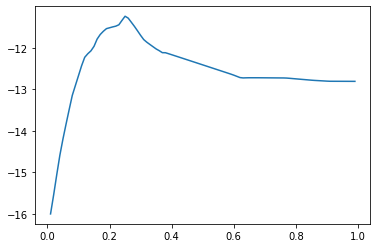

In [42]:
# find the best alpha parameter
from sklearn.linear_model import Lasso
lm_l = Lasso()
lm_l.fit(x_train,y_train)
scores = cross_val_score(lm, x_train, y_train, scoring = 'neg_mean_absolute_error', cv=3)

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,x_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [43]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,x_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-13.75512907723064

In [44]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(x_train,y_train)

gs.best_score_
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
gs.best_score_

-12.962041270843356

In [68]:
# test ensembles 
tpred_lm = lm.predict(x_test)
tpred_lml = lm_l.predict(x_test)
tpred_rf = gs.best_estimator_.predict(x_test)

from sklearn.metrics import mean_absolute_error
test_lm = mean_absolute_error(y_test,tpred_lm)
test_lml = mean_absolute_error(y_test,tpred_lml)
test_rf = mean_absolute_error(y_test,tpred_rf)

test_lm_rf = mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

print(test_lm)
print(test_lml)
print(test_rf)
print(test_lm_rf)

16.075543027935606
14.244750816514804
24.62146464646465
17.162039092092805


In [47]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   total-cases      131 non-null    int64  
 1   discharged       131 non-null    float64
 2   death            131 non-null    float64
 3   icu              131 non-null    float64
 4   pui              131 non-null    float64
 5   close-contact    131 non-null    float64
 6   tabligh          131 non-null    float64
 7   surveillance     131 non-null    float64
 8   hadr             131 non-null    float64
 9   import           131 non-null    float64
 10  perlis           131 non-null    float64
 11  kedah            131 non-null    float64
 12  pulau-pinang     131 non-null    float64
 13  perak            131 non-null    float64
 14  selangor         131 non-null    float64
 15  negeri-sembilan  131 non-null    float64
 16  melaka           131 non-null    float64
 17  johor           

# New Model (predictive model) 

In [0]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
X = scale(df) 
y = df.cases
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
np.mean(cross_val_score(rf,x_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


-13.831239850138287

In [61]:
tpred_logreg = logreg.predict(X_test)

test_logreg = mean_absolute_error(y_test,tpred_logreg)
print(test_logreg)

21.575757575757574


In [50]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc_b = RFC()
rfc_b.fit(X_train,y_train)
y_pred = rfc_b.predict(X_train)
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:', accuracy_score(y_test,rfc_b.predict(X_test)))

Train accuracy score: 1.0
Test accuracy score: 0.24242424242424243


In [51]:
from sklearn.linear_model import Ridge
import numpy as np
ridge = Ridge()
ridge.fit(X_train,y_train)
y_prob = ridge.predict(X_train)
y_pred = np.asarray([np.argmax(line) for line in y_prob])
yp_test = ridge.predict(X_test)
test_preds = np.asarray([np.argmax(line) for line in yp_test])
print(accuracy_score(y_train,y_pred))
print(accuracy_score(y_test,test_preds))

0.19387755102040816
0.24242424242424243


In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_train)
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:',accuracy_score(y_test,knn.predict(X_test)))

Train accuracy score: 0.21428571428571427
Test accuracy score: 0.24242424242424243


In [53]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[13:10:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 55.258755
